Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification.

# Download dataset

In [1]:
!pip install yfinance

# Collect the stock market data of some popular Indian companies:

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = data.reset_index()

In [3]:
data.head()

Price                       Date    Adj Close                            \
Ticker                            HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0      2023-09-04 00:00:00+00:00  1563.203857  1438.272583  2402.545654   
1      2023-09-05 00:00:00+00:00  1553.683838  1451.820068  2415.402344   
2      2023-09-06 00:00:00+00:00  1574.006226  1450.396362  2420.484863   
3      2023-09-07 00:00:00+00:00  1589.149414  1439.352417  2423.773682   
4      2023-09-08 00:00:00+00:00  1601.530396  1442.690186  2439.918945   

Price                      Close                                         \
Ticker       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0       3361.653320  1584.550049  1465.099976  2410.699951  3418.500000   
1       3372.322754  1574.900024  1478.900024  2423.600098  3429.350098   
2       3372.863770  1595.500000  1477.449951  2428.699951  3429.899902   
3       3397.792236  1610.849976  1466.199951  2432.000000  3455.250000   
4       3384.664062  1623.400024  1469.599976  2448.199951  3441.899902   

Price          High  ...          Low                      Open               \
Ticker  HDFCBANK.NS  ...  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
0       1591.449951  ...  2405.300049  3370.050049  1590.000000  1443.000000   
1       1588.400024  ...  2412.449951  3405.149902  1588.400024  1465.000000   
2       1600.000000  ...  2417.250000  3398.100098  1576.800049  1481.900024   
3       1614.000000  ...  2411.000000  3422.300049  1595.500000  1470.599976   
4       1632.900024  ...  2422.949951  3435.050049  1608.300049  1463.500000   

Price                                 Volume                                
Ticker  RELIANCE.NS       TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
0       2412.649902  3378.000000    12536819  4609014     4673813  1828332  
1       2420.000000  3420.000000    19356041  5496840     4337938  1501842  
2       2421.100098  3434.000000    28160455  5075786     4100185  1314818  
3       2421.699951  3430.800049    17104171  4411743     6826286  1885092  
4       2440.000000  3455.250000    17251105  3125838    11554644  1518917  

[5 rows x 25 columns]

In [4]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

In [7]:
data_melted.head()

,Date,Attribute,Ticker,value
0,2023-09-04 00:00:00+00:00,Adj Close,HDFCBANK.NS,1563.203857
1,2023-09-05 00:00:00+00:00,Adj Close,HDFCBANK.NS,1553.683838
2,2023-09-06 00:00:00+00:00,Adj Close,HDFCBANK.NS,1574.006226
3,2023-09-07 00:00:00+00:00,Adj Close,HDFCBANK.NS,1589.149414
4,2023-09-08 00:00:00+00:00,Adj Close,HDFCBANK.NS,1601.530396


In [8]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

In [9]:
data_pivoted.head()

Attribute                                Adj Close        Close         High  \
Date                      Ticker                                               
2023-09-04 00:00:00+00:00 HDFCBANK.NS  1563.203857  1584.550049  1591.449951   
                          INFY.NS      1438.272583  1465.099976  1470.000000   
                          RELIANCE.NS  2402.545654  2410.699951  2423.649902   
                          TCS.NS       3361.653320  3418.500000  3432.850098   
2023-09-05 00:00:00+00:00 HDFCBANK.NS  1553.683838  1574.900024  1588.400024   

Attribute                                      Low         Open      Volume  
Date                      Ticker                                             
2023-09-04 00:00:00+00:00 HDFCBANK.NS  1574.900024  1590.000000  12536819.0  
                          INFY.NS      1434.699951  1443.000000   4609014.0  
                          RELIANCE.NS  2405.300049  2412.649902   4673813.0  
                          TCS.NS       3370.050049  3378.000000   1828332.0  
2023-09-05 00:00:00+00:00 HDFCBANK.NS  1570.599976  1588.400024  19356041.0

In [10]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()
stock_data.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-04 00:00:00+00:00,HDFCBANK.NS,1563.203857,1584.550049,1591.449951,1574.900024,1590.000000,12536819.0
1,2023-09-04 00:00:00+00:00,INFY.NS,1438.272583,1465.099976,1470.000000,1434.699951,1443.000000,4609014.0
2,2023-09-04 00:00:00+00:00,RELIANCE.NS,2402.545654,2410.699951,2423.649902,2405.300049,2412.649902,4673813.0
3,2023-09-04 00:00:00+00:00,TCS.NS,3361.653320,3418.500000,3432.850098,3370.050049,3378.000000,1828332.0
4,2023-09-05 00:00:00+00:00,HDFCBANK.NS,1553.683838,1574.900024,1588.400024,1570.599976,1588.400024,19356041.0


# Have a look at the stock market performance of these companies in the stock market over time:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_theme()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   (Date, )                  242 non-null    datetime64[ns, UTC]
 1   (Adj Close, HDFCBANK.NS)  242 non-null    float64            
 2   (Adj Close, INFY.NS)      242 non-null    float64            
 3   (Adj Close, RELIANCE.NS)  242 non-null    float64            
 4   (Adj Close, TCS.NS)       242 non-null    float64            
 5   (Close, HDFCBANK.NS)      242 non-null    float64            
 6   (Close, INFY.NS)          242 non-null    float64            
 7   (Close, RELIANCE.NS)      242 non-null    float64            
 8   (Close, TCS.NS)           242 non-null    float64            
 9   (High, HDFCBANK.NS)       242 non-null    float64            
 10  (High, INFY.NS)           242 non-null    float64            
 11  (High, RELIANCE.NS)

In [13]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)

stock_data.reset_index(inplace=True)

In [14]:
stock_data.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-04 00:00:00+00:00,HDFCBANK.NS,1563.203857,1584.550049,1591.449951,1574.900024,1590.000000,12536819.0
1,2023-09-04 00:00:00+00:00,INFY.NS,1438.272583,1465.099976,1470.000000,1434.699951,1443.000000,4609014.0
2,2023-09-04 00:00:00+00:00,RELIANCE.NS,2402.545654,2410.699951,2423.649902,2405.300049,2412.649902,4673813.0
3,2023-09-04 00:00:00+00:00,TCS.NS,3361.653320,3418.500000,3432.850098,3370.050049,3378.000000,1828332.0
4,2023-09-05 00:00:00+00:00,HDFCBANK.NS,1553.683838,1574.900024,1588.400024,1570.599976,1588.400024,19356041.0


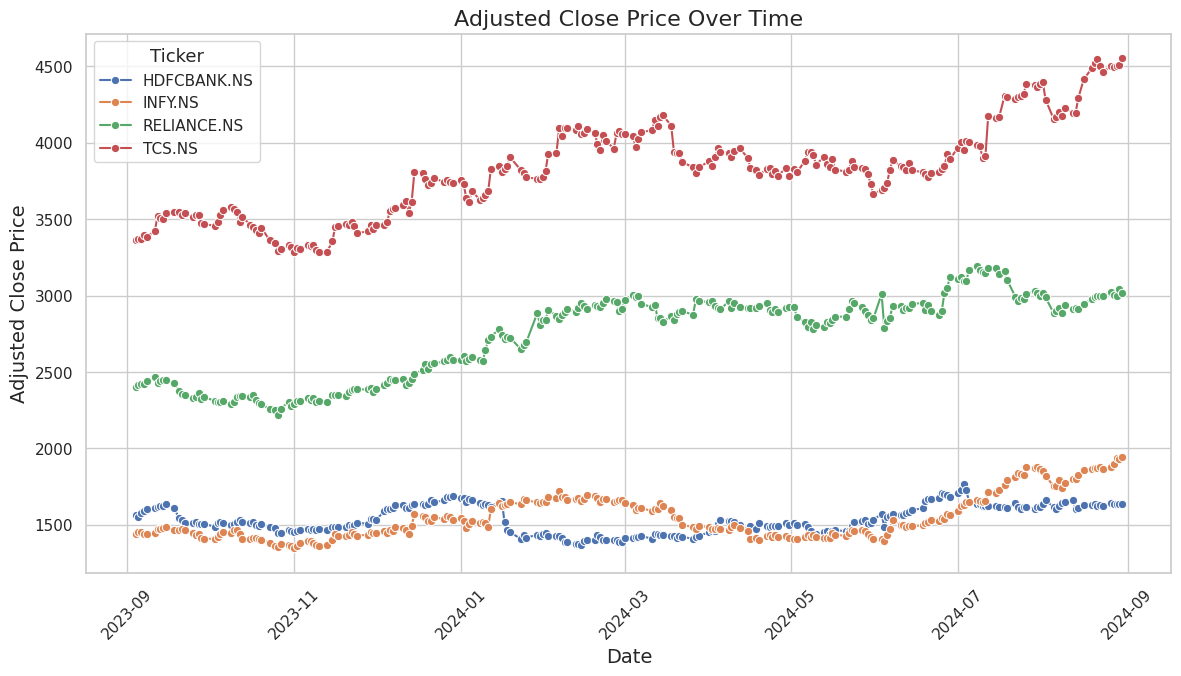

In [15]:
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

# Compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:

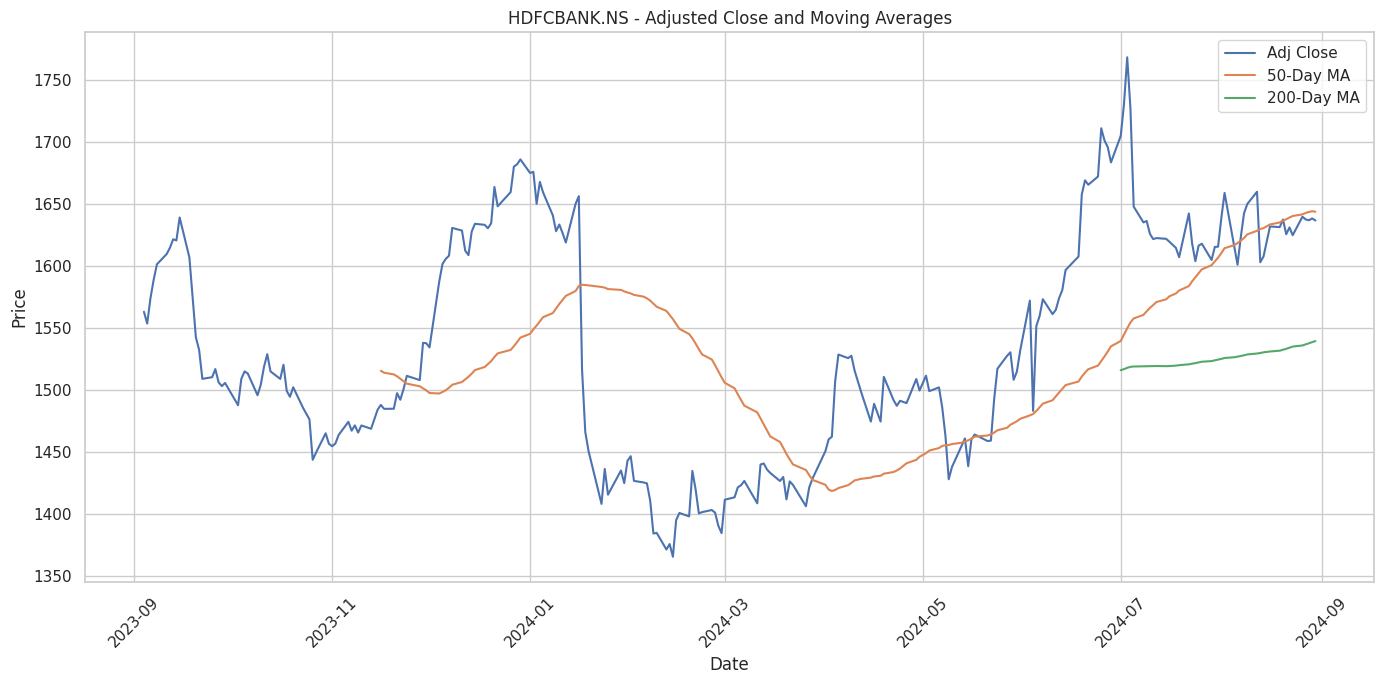

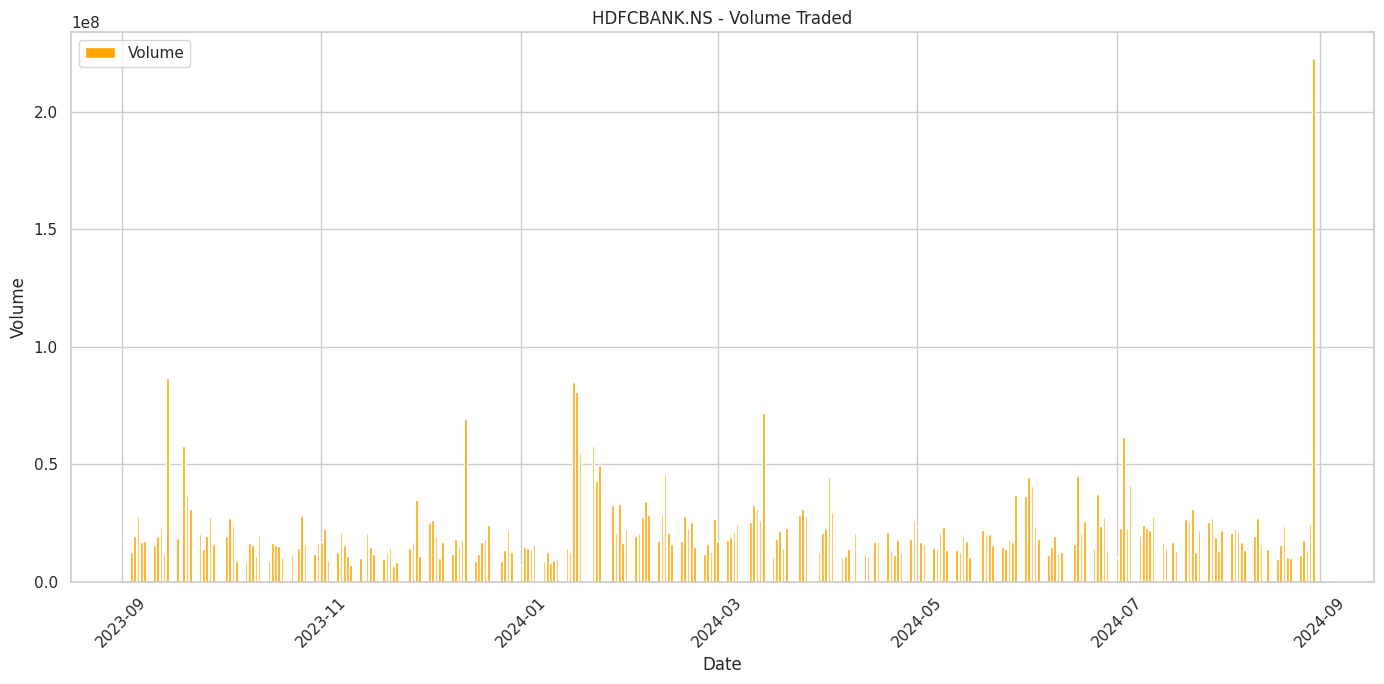

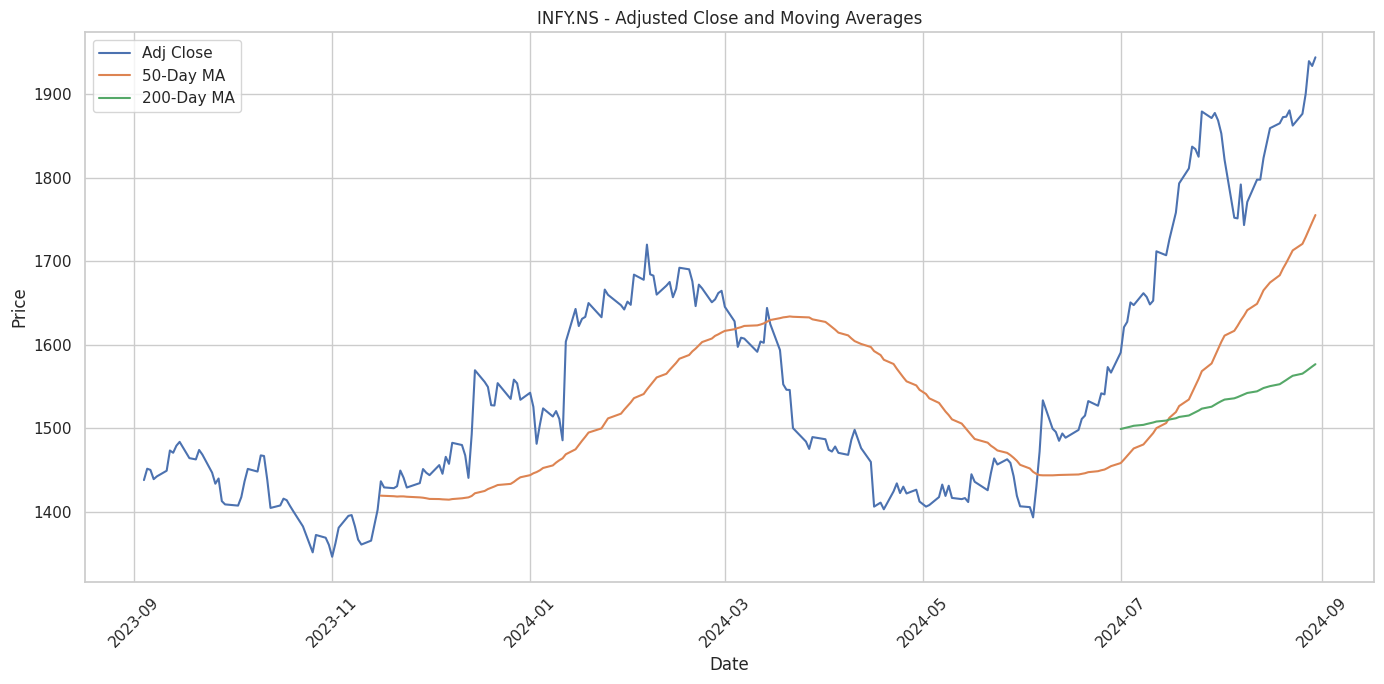

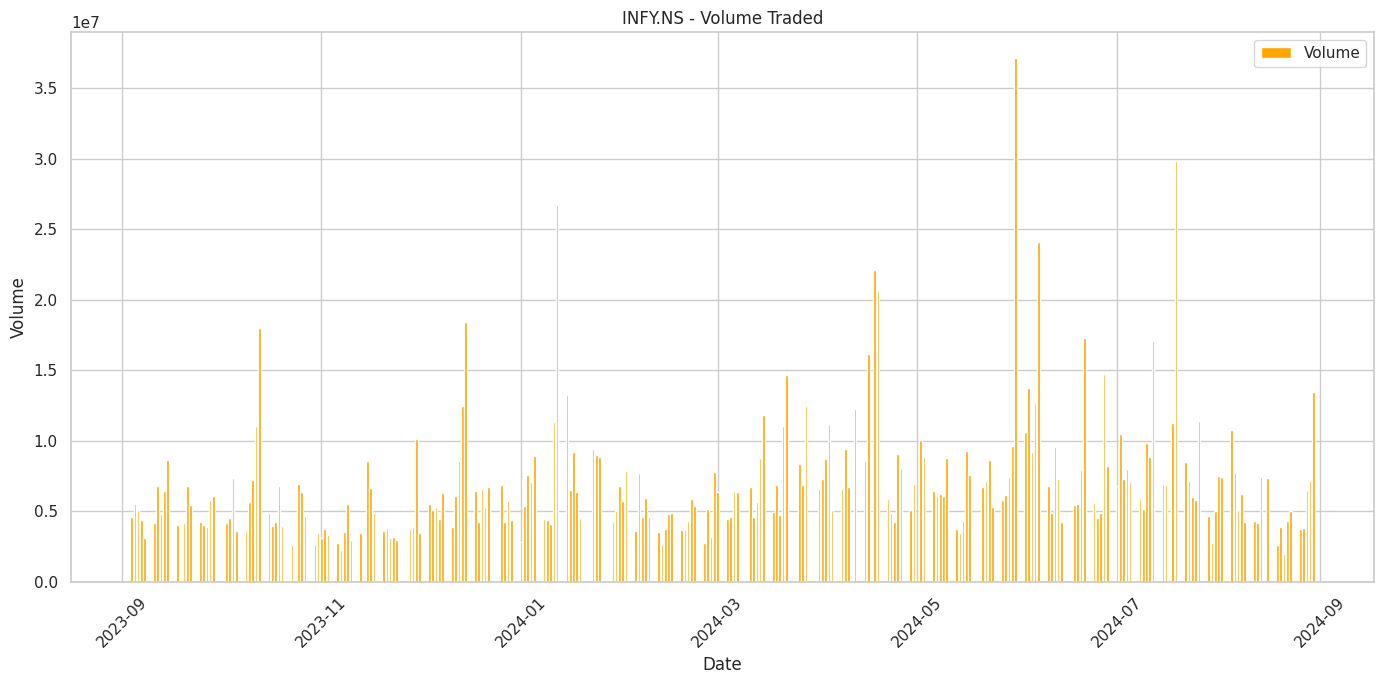

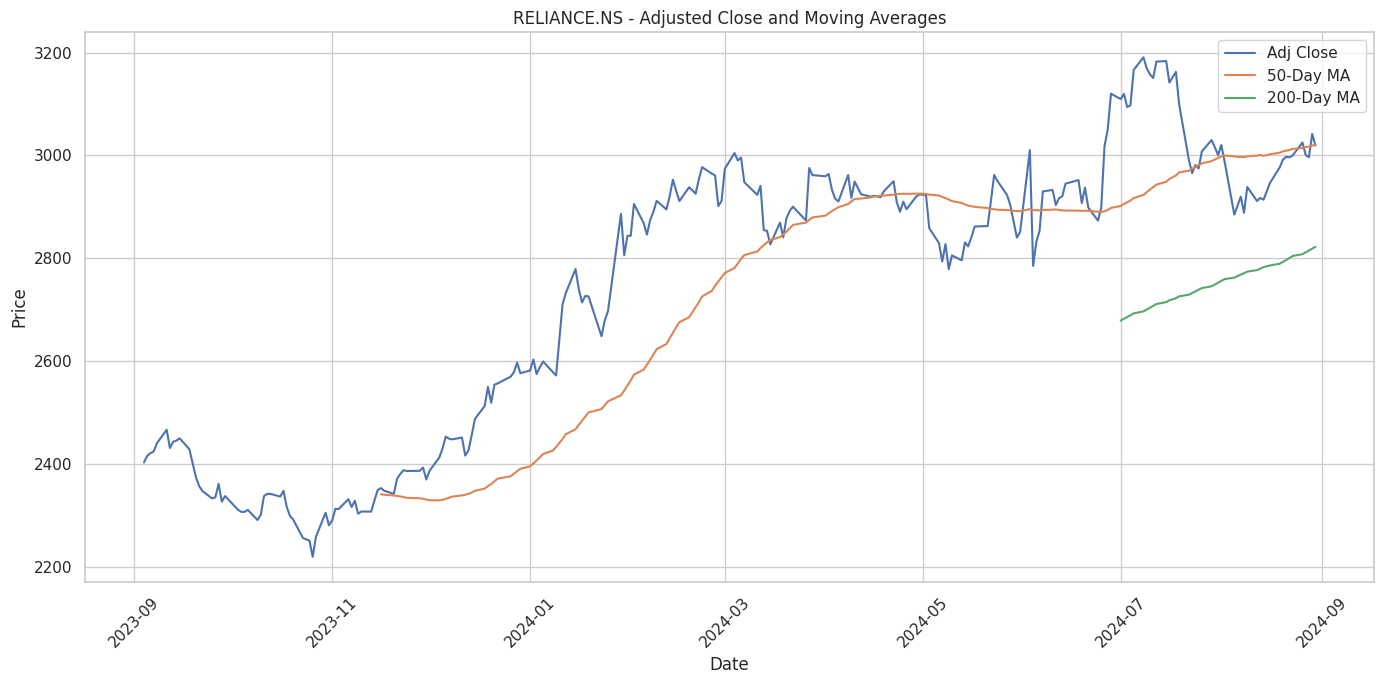

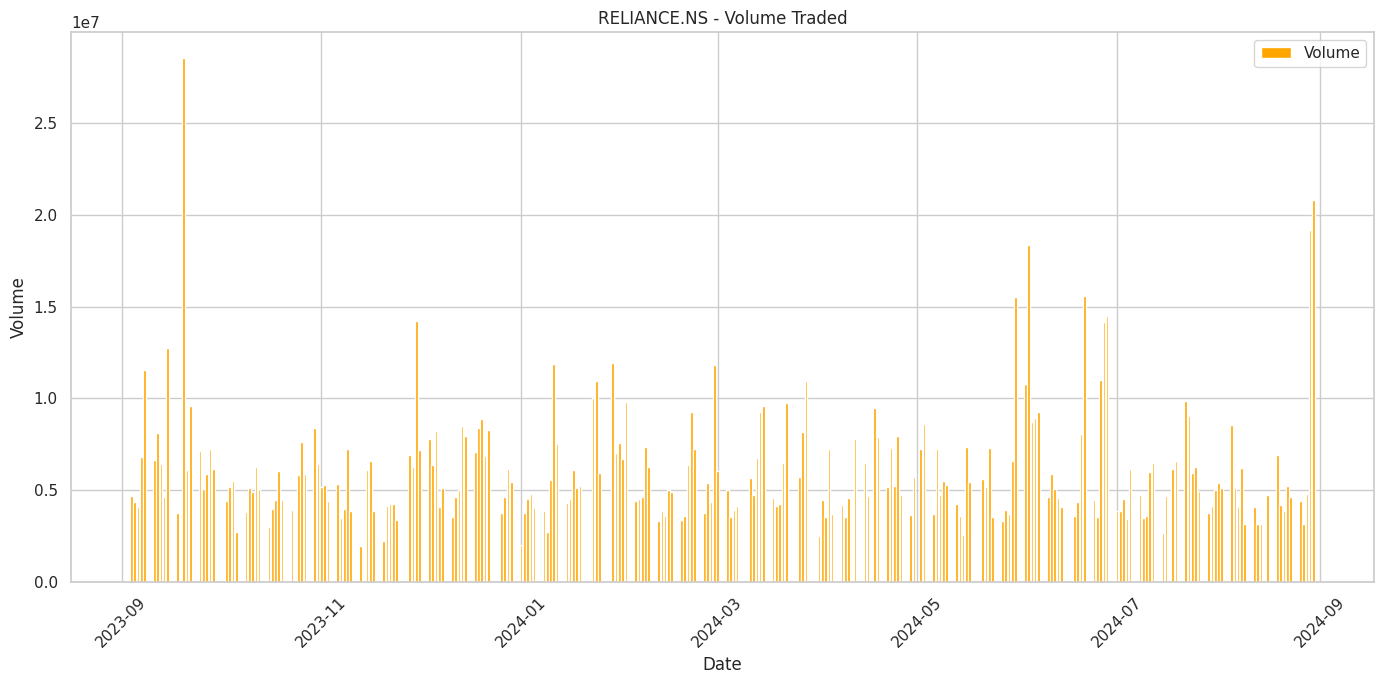

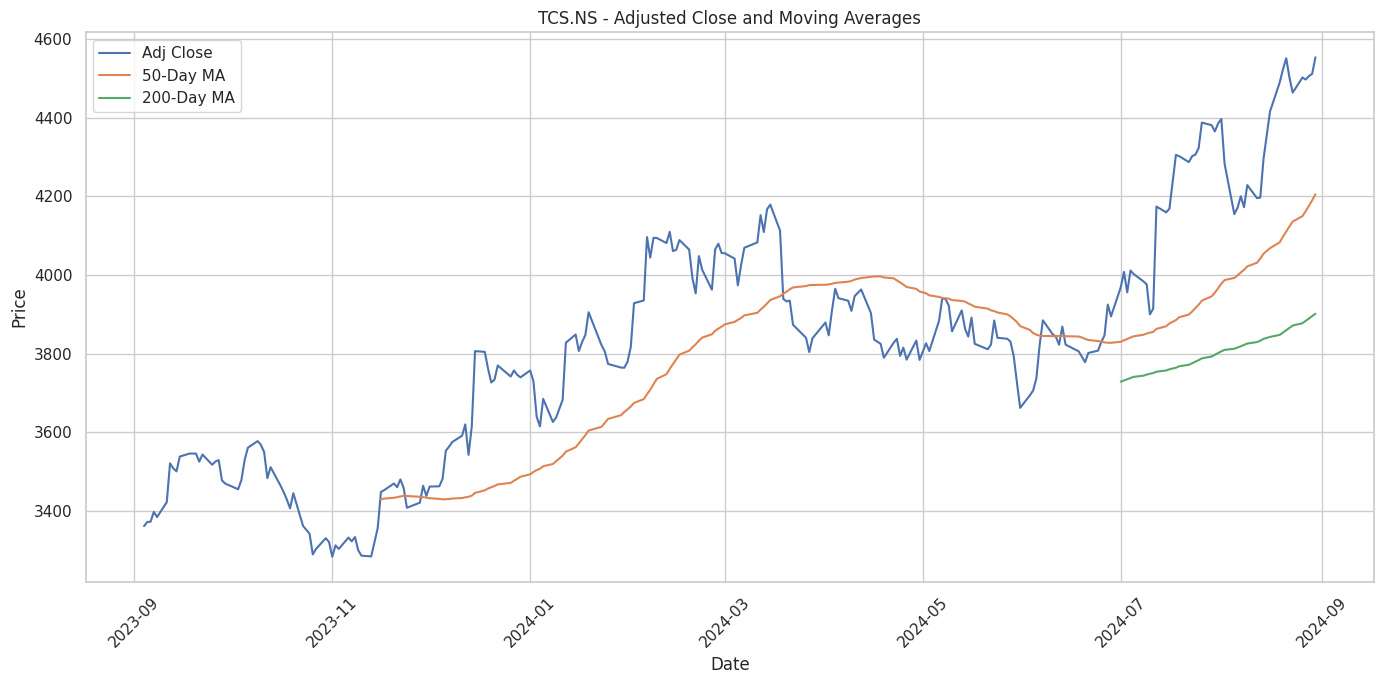

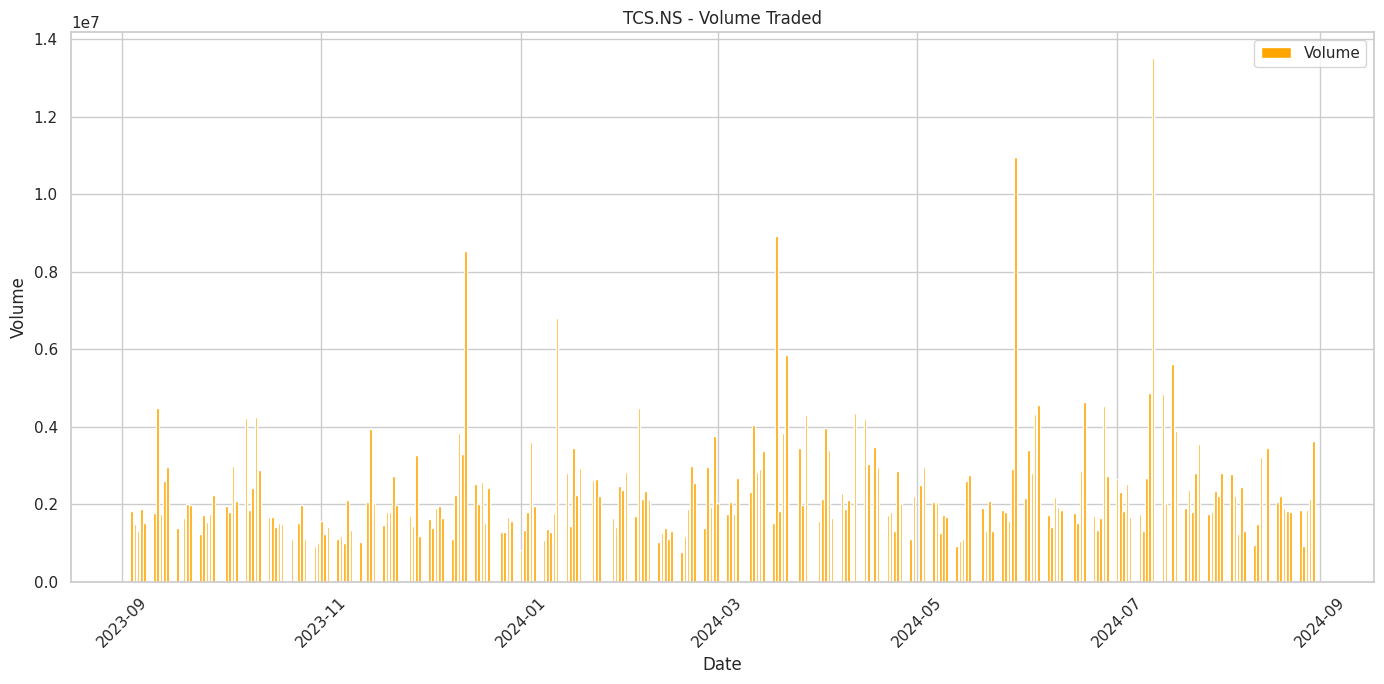

In [16]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions.

# Have a look at the distribution of daily returns of these stocks:

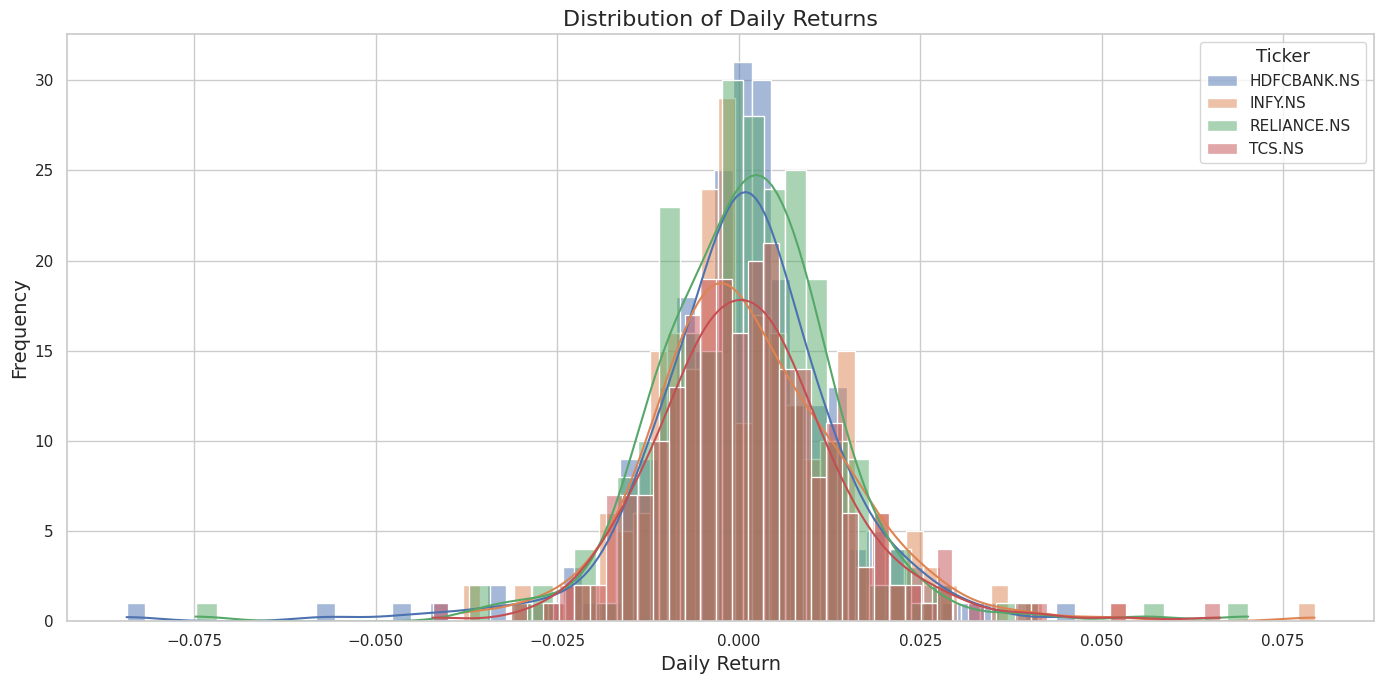

In [17]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

# Let’s see if there’s any correlation between all these stocks:

In [19]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
daily_returns

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2023-09-05 00:00:00+00:00,-0.006090,0.009419,0.005351,0.003174
2023-09-06 00:00:00+00:00,0.013080,-0.000981,0.002104,0.000160
2023-09-07 00:00:00+00:00,0.009621,-0.007614,0.001359,0.007391
2023-09-08 00:00:00+00:00,0.007791,0.002319,0.006661,-0.003864
2023-09-11 00:00:00+00:00,0.005174,0.004661,0.010783,0.011258
...,...,...,...,...
2024-08-26 00:00:00+00:00,0.009169,0.007545,0.008417,0.008636
2024-08-27 00:00:00+00:00,-0.001341,0.012765,-0.008033,-0.001177
2024-08-28 00:00:00+00:00,-0.000397,0.020525,-0.001433,0.001979


In [20]:
correlation_matrix = daily_returns.corr()
correlation_matrix

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Ticker,,,,
HDFCBANK.NS,1.000000,0.167910,0.321358,0.078670
INFY.NS,0.167910,1.000000,0.185049,0.715526
RELIANCE.NS,0.321358,0.185049,1.000000,0.210102
TCS.NS,0.078670,0.715526,0.210102,1.000000


In [22]:
# ones_like can build a matrix of boolean (True, False) with the same shape as our data
import numpy as np
ones_corr  = np.ones_like(correlation_matrix,dtype=bool)

In [23]:
ones_corr.shape, correlation_matrix.shape

((4, 4), (4, 4))

In [24]:
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [25]:
adjusted_mask = mask[1:,:-1]
adjusted_mask

array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

In [26]:
adjusted_df_corr = correlation_matrix.iloc[1:,:-1]

In [27]:
adjusted_df_corr

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS
Ticker,,,
INFY.NS,0.167910,1.000000,0.185049
RELIANCE.NS,0.321358,0.185049,1.000000
TCS.NS,0.078670,0.715526,0.210102


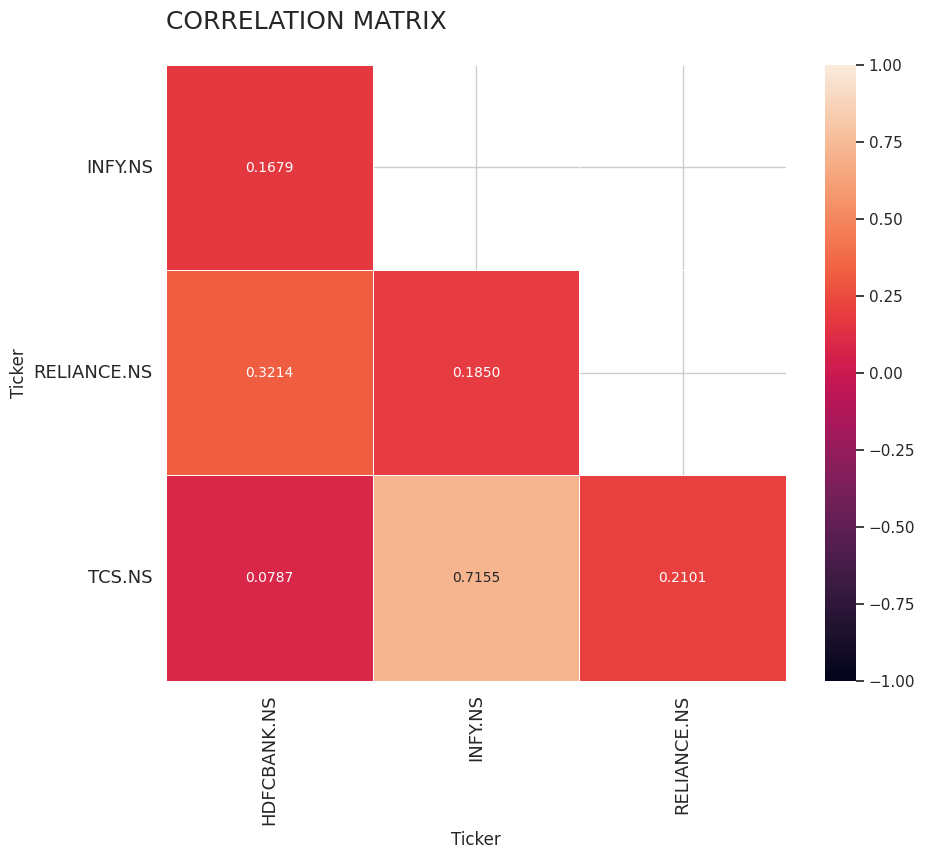

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".4f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.37) and a low correlation with INFY (0.17) and TCS (0.10). RELIANCE shows a low correlation with INFY (0.19) and TCS (0.13). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

# Portfolio Optimization

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:
- Calculate the expected returns and volatility for each stock.
- Generate a series of random portfolios to identify the efficient frontier.
- Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

## Calculate the expected returns and volatility for each stock:

In [30]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.072028,0.217531
INFY.NS,0.339353,0.221792
RELIANCE.NS,0.261677,0.213366
TCS.NS,0.338872,0.207670


INFY.NS has the highest expected return (33.93%) and moderate volatility (22.17%), which indicates a potentially high-reward investment with relatively higher risk. INFY and TCS also have high expected returns (21.38% and 22.09% respectively) with moderate volatility (23.23% and 19.69%). HDFCBANK has the lowest expected return (1.37%) and moderate volatility (20.69%), which makes it the least attractive in terms of risk-adjusted returns.

- INFY.NS has the highest expected return (33.93%) and moderate volatility (22.17%), , which indicates a potentially high-reward investment with relatively higher risk.
- TCS.NS and RELIANCE.NS also have high expected returns (33.88% and 26.16% respectively) with moderate volatility (20.76% and 21.33%).
- HDFCBANK has the lowest expected return (7.2%) and moderate volatility (21.75%), which makes it the least attractive in terms of risk-adjusted returns.

## Generate a series of random portfolios to identify the efficient frontier.
- Generate a large number of random portfolio weights.
- Calculate the expected return and volatility for each portfolio.
- Plot these portfolios to visualize the efficient frontier.

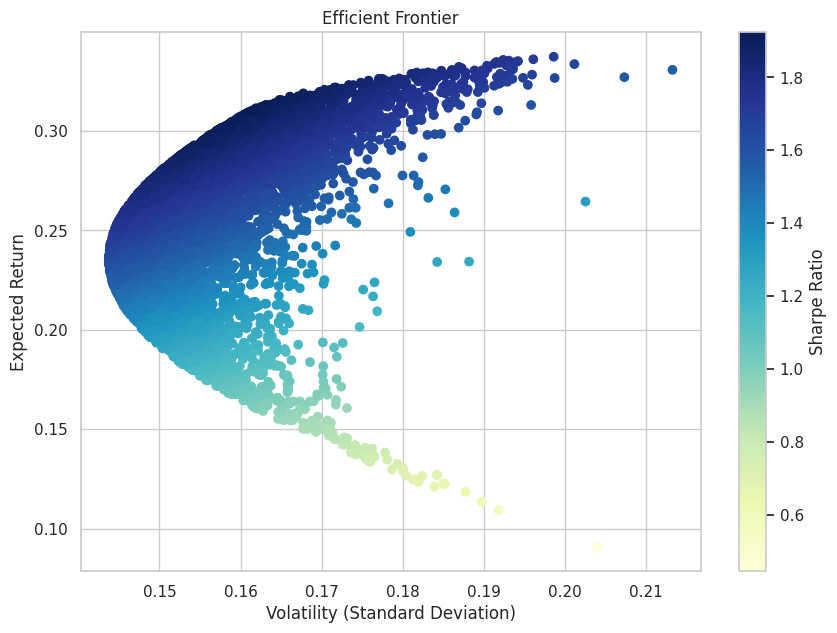

In [31]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

Here’s how to identify the portfolio with the maximum Sharpe ratio:

In [32]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.3115110707708102, 0.16191197842007726, 1.9239532109391018)

The portfolio with the maximum Sharpe ratio has the following characteristics:
- Expected Return: ~31.18%
- Volatility: ~16.19%
- Sharpe Ratio: ~1.92%

##  Let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [40]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df.sort_values(by='Weight', ascending=False, inplace=True)
portfolio_weights_df

,Ticker,Weight
1,INFY.NS,0.446008
0,HDFCBANK.NS,0.315459
2,RELIANCE.NS,0.140183
3,TCS.NS,0.098351


So, this is how stock market portfolio optimization works. Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification.

Run multiple times and take the average value:

In [41]:
num_runs = 100
accumulated_weights = np.zeros(len(unique_tickers))

for _ in range(num_runs):
    max_sharpe_ratio = -np.inf
    max_sharpe_weights = np.zeros(len(unique_tickers))

    for i in range(num_portfolios):
        weights = np.random.random(len(unique_tickers))
        weights /= np.sum(weights)

        portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
        sharpe_ratio = portfolio_return / portfolio_volatility

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            max_sharpe_weights = weights

    accumulated_weights += max_sharpe_weights

averaged_weights = accumulated_weights / num_runs

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': averaged_weights
})

portfolio_weights_df.sort_values(by='Weight', ascending=False, inplace=True)
portfolio_weights_df

,Ticker,Weight
3,TCS.NS,0.381696
2,RELIANCE.NS,0.355257
1,INFY.NS,0.260328
0,HDFCBANK.NS,0.002719
